## 1. Lectura de Archivos

In [ ]:

# 📦 Configuración global del proyecto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



import os

# Ruta segura hacia los archivos originales
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
original_path = os.path.join(notebook_dir, "..", "data", "original")

# Ejemplo: carga de archivos
transaction_path = os.path.join(original_path, "test_transaction.csv")
identity_path = os.path.join(original_path, "test_identity.csv")

# Cargar archivos (ajusta los nombres según los tuyos reales)
trans = pd.read_csv(transaction_path)
iden = pd.read_csv(identity_path)


## 2. División de la tabla `trans` en subtablas

In [89]:

# Subtabla básica con columnas hasta R_emaildomain
trans_basic = trans.loc[:, :'R_emaildomain'].copy()

# Ingeniería de tiempo
fecha_inicio = pd.to_datetime('2017-01-01')
trans_basic['TransactionDT'] = pd.to_timedelta(trans_basic['TransactionDT'], unit='s') + fecha_inicio
trans_basic['TransactionHour'] = trans_basic['TransactionDT'].dt.hour
trans_basic['TransactionDay'] = trans_basic['TransactionDT'].dt.dayofweek
trans_basic['TransactionDate'] = trans_basic['TransactionDT'].dt.date

# Subtablas
trans_match = trans[[col for col in trans.columns if col.startswith('M') or col == 'TransactionID']]
trans_count = trans[[col for col in trans.columns if col.startswith('C') or col == 'TransactionID']]
trans_delta = trans[[col for col in trans.columns if col.startswith('D') or col == 'TransactionID']]
trans_vesta = trans[[col for col in trans.columns if col.startswith('V') or col == 'TransactionID']]


display(trans_basic.head(5))


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,TransactionHour,TransactionDay,TransactionDate
0,3663549,2017-08-02 00:00:24,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,0,2,2017-08-02
1,3663550,2017-08-02 00:01:03,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,0,2,2017-08-02
2,3663551,2017-08-02 00:01:50,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,0,2,2017-08-02
3,3663552,2017-08-02 00:01:50,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,0,2,2017-08-02
4,3663553,2017-08-02 00:01:57,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,0,2,2017-08-02


## 3. Porcentaje de valores faltantes

In [90]:

def missing_percent(df):
    return df.isnull().mean().sort_values(ascending=False)*100.000

missing_percent(trans_basic)

dist2              92.809030
R_emaildomain      73.184840
dist1              57.474279
P_emaildomain      13.655660
addr1              12.948523
addr2              12.948523
card2               1.707944
card5               0.897391
card4               0.609050
card6               0.593458
card3               0.592472
TransactionDay      0.000000
TransactionHour     0.000000
TransactionID       0.000000
TransactionDT       0.000000
card1               0.000000
ProductCD           0.000000
TransactionAmt      0.000000
TransactionDate     0.000000
dtype: float64

### 3.1 Eliminar columnas con >90% NaN en identity

In [91]:

iden_reducida = iden.loc[:, iden.isnull().mean() < 0.9].copy()

iden_reducida = iden_reducida[['TransactionID', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06',
       'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14', 'id-15', 'id-16',
       'id-17', 'id-18', 'id-19', 'id-20', 'id-28', 'id-29',  'id-31',
       'id-32', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38',
       'DeviceType']]

display(iden_reducida.head(5))


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-28,id-29,id-31,id-32,id-34,id-35,id-36,id-37,id-38,DeviceType
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,New,NotFound,chrome 67.0 for android,NaN,NaN,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,Found,Found,chrome 67.0 for android,24.0,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,New,NotFound,ie 11.0 for tablet,NaN,NaN,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,Found,Found,chrome 67.0 for android,NaN,NaN,F,F,T,F,mobile
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,New,NotFound,chrome 67.0 for android,NaN,NaN,F,F,T,F,mobile


## 4. Manejo de registros duplicados

In [92]:

print(f"Duplicados en transacción: {trans.duplicated().sum()}")
trans.drop_duplicates(inplace=True)

print(f"Duplicados en identidad: {iden.duplicated().sum()}")
iden.drop_duplicates(inplace=True)


Duplicados en transacción: 0
Duplicados en identidad: 0


## 5. EDA básica de variables clave

In [93]:

# Funciones auxiliares para EDA

def plot_distribution(df, column, bins=50, log=False):
    plt.figure(figsize=(10, 4))
    data = df[column].dropna()
    if log:
        data = np.log1p(data)
        title = f'Distribución log({column})'
    else:
        title = f'Distribución de {column}'
    sns.histplot(data, bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

def plot_countplot(df, column, top_n=None):
    plt.figure(figsize=(10, 4))
    if top_n:
        top_vals = df[column].value_counts().nlargest(top_n).index
        sns.countplot(data=df[df[column].isin(top_vals)], x=column, order=top_vals)
    else:
        sns.countplot(x=column, data=df)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.show()
    
def describe_columns(df, title='Resumen Descriptivo'):
    # Eliminar columnas con todos los valores NaN
    df_limpio = df.dropna(axis=1, how='all')
    
    # Descripción extendida para todo tipo de columnas
    desc = df_limpio.describe(include='all').T
    
    # Añadir columnas adicionales útiles
    desc['missing_%'] = df_limpio.isnull().mean() * 100
    desc['dtype'] = df_limpio.dtypes
    
    print(f"📊 {title}")
    display(desc.sort_index())


📊 Variables básicas


,count,unique,top,freq,mean,min,25%,50%,75%,max,std,missing_%,dtype
ClientID,506691,82606,695992d2f68ef761bde4207dc1e36198bd67dac67989e4...,5193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,object
P_emaildomain,437499,60,gmail.com,207448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.655660,object
ProductCD,506691,5,W,360987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,object
R_emaildomain,135870,60,gmail.com,61738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.184840,object
TransactionAmt,506691.0,NaN,NaN,NaN,134.725568,0.018,40.0,67.95,125.0,10270.0,245.779822,0.000000,float64
TransactionDT,506691,NaN,NaN,NaN,2017-11-08 16:32:17.228952320,2017-08-02 00:00:24,2017-09-21 13:25:40.500000,2017-11-11 20:50:58,2017-12-29 19:56:00.500000,2018-01-31 23:59:05,NaN,0.000000,datetime64[ns]
TransactionDate,506691,183,2018-01-25,6784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,object
TransactionDay,506691.0,NaN,NaN,NaN,2.996651,0.0,1.0,3.0,5.0,6.0,2.018955,0.000000,int32
TransactionHour,506691.0,NaN,NaN,NaN,13.961448,0.0,8.0,16.0,20.0,23.0,7.475648,0.000000,int32
TransactionID,506691.0,NaN,NaN,NaN,3916894.0,3663549.0,3790221.5,3916894.0,4043566.5,4170239.0,146269.23696,0.000000,int64


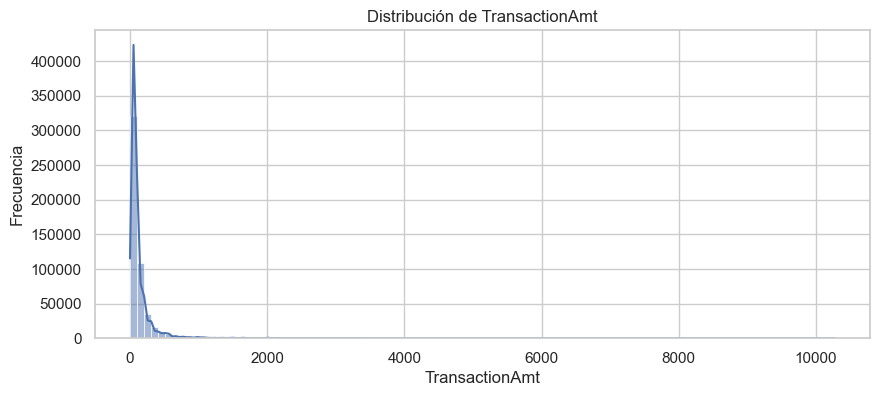

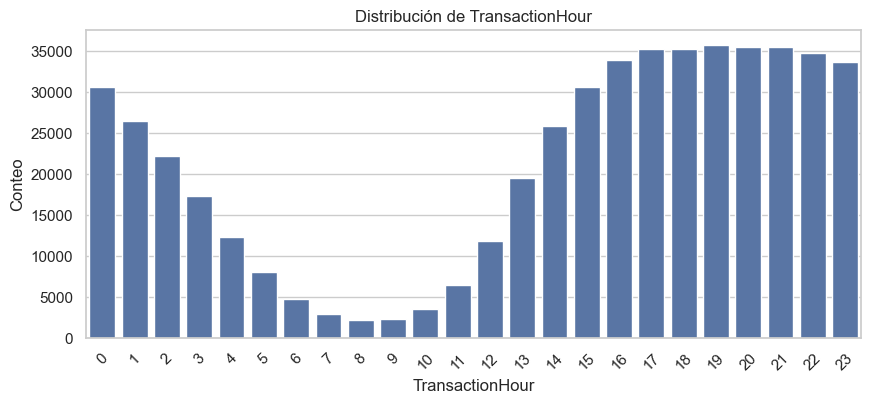

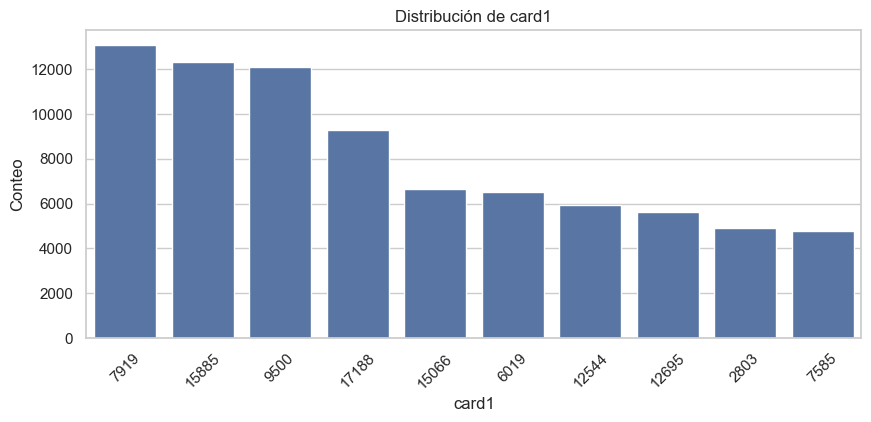

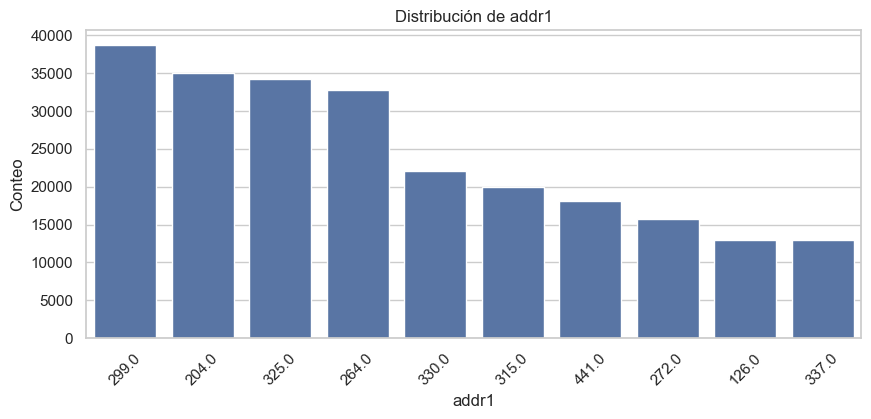

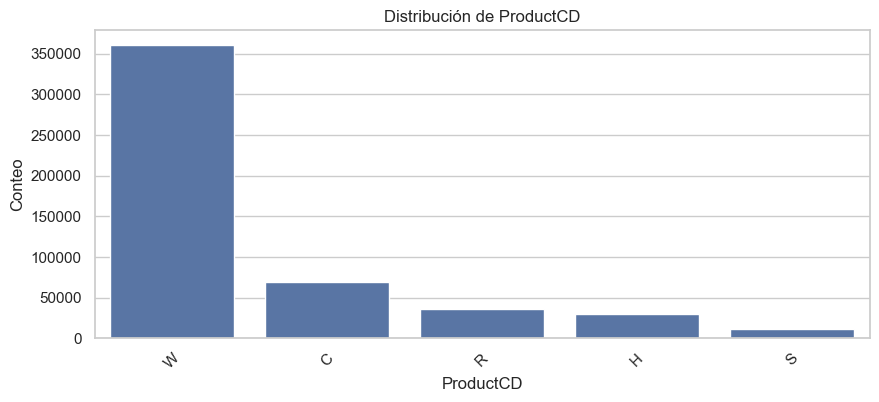

📊 Variables tipo M


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_%,dtype
M1,330052,2,T,330021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.861286,object
M2,330052,2,T,302855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.861286,object
M3,330052,2,T,266513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.861286,object
M4,268946,3,M0,161384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.921102,object
M5,197059,2,F,107664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.108644,object
M6,347752,2,F,191577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.368033,object
M7,271673,2,F,233230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.382904,object
M8,271687,2,F,168399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.380141,object
M9,271687,2,T,236279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.380141,object
TransactionID,506691.0,NaN,NaN,NaN,3916894.0,146269.23696,3663549.0,3790221.5,3916894.0,4043566.5,4170239.0,0.000000,int64


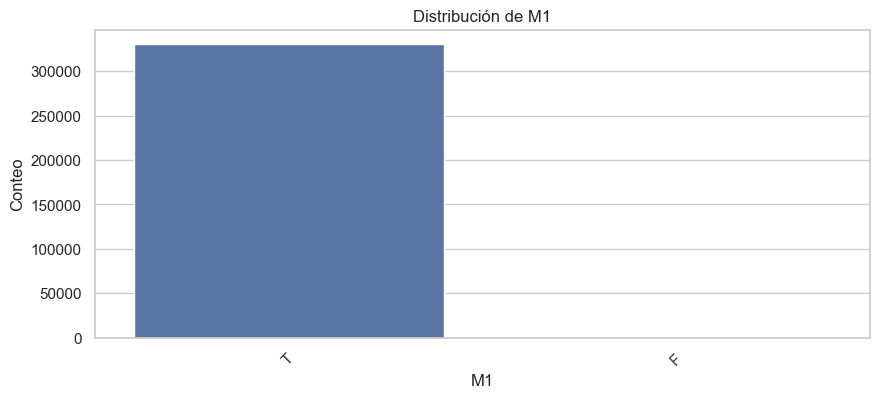

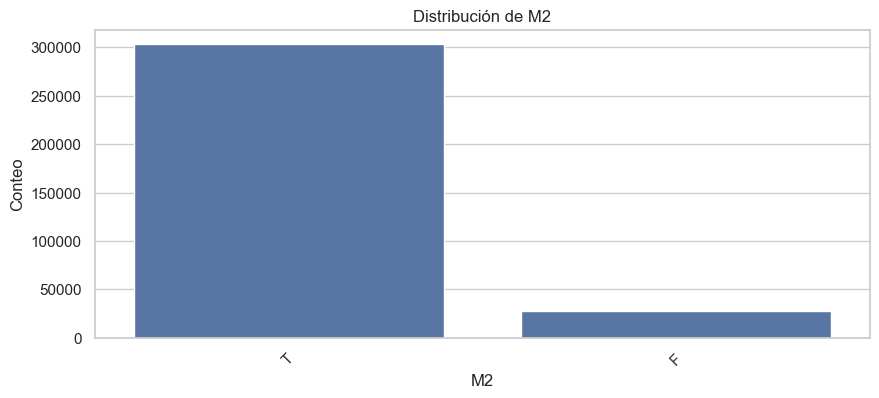

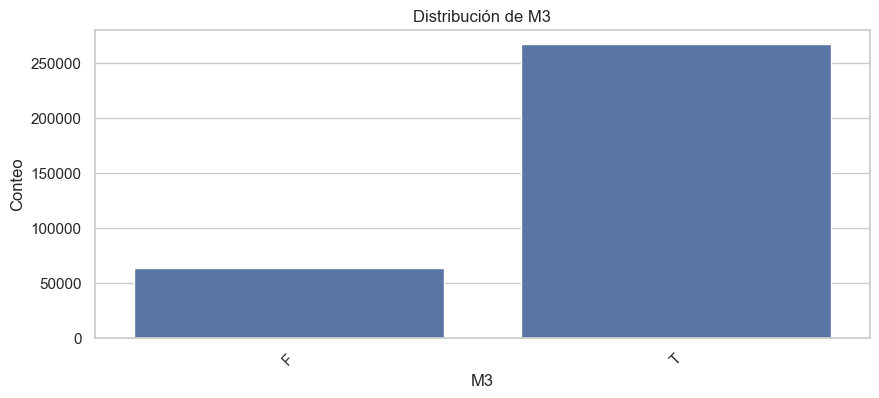

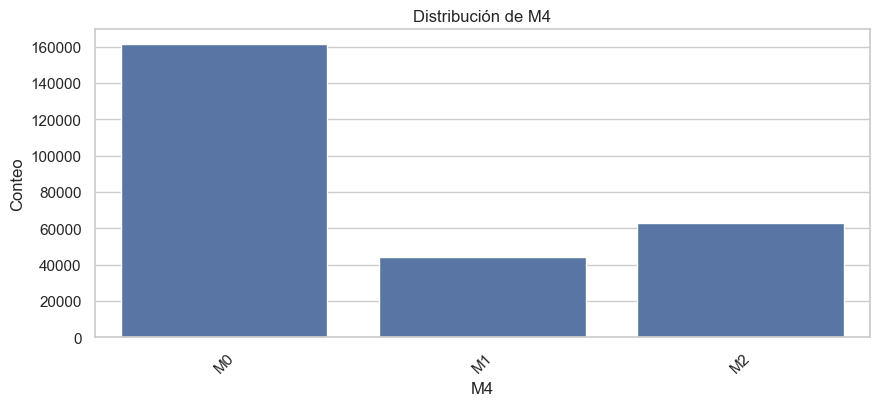

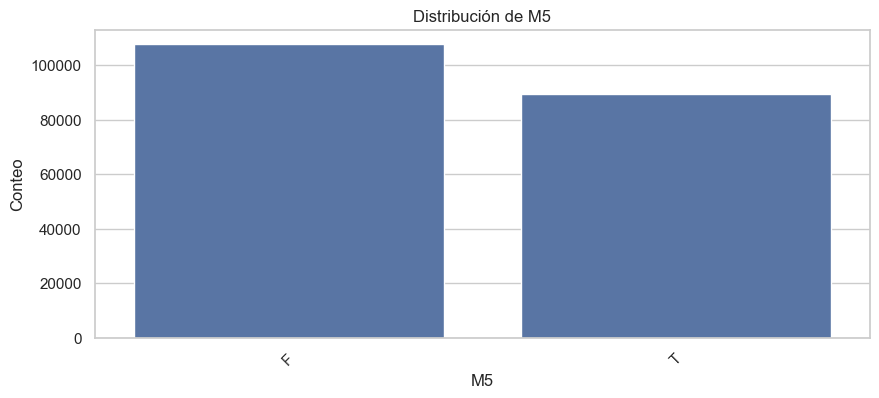

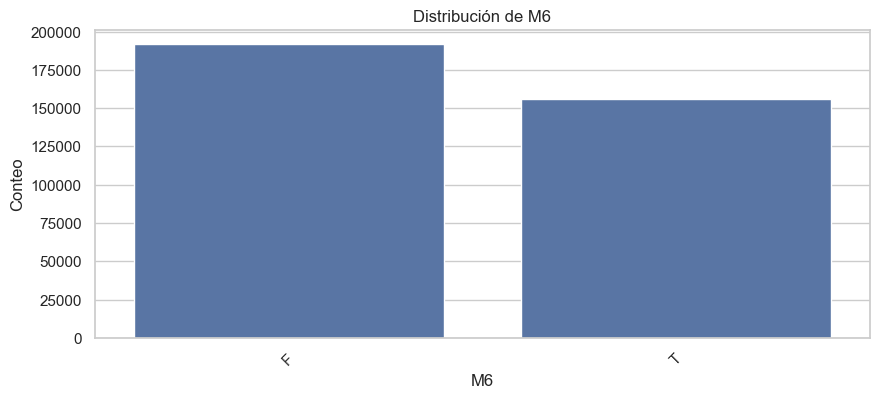

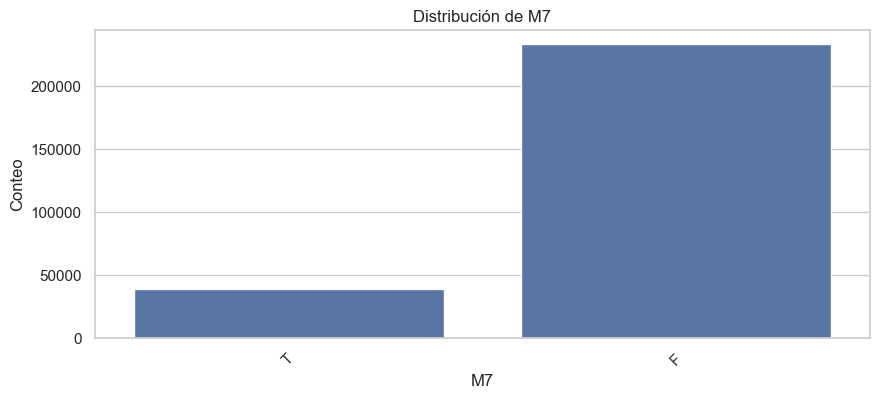

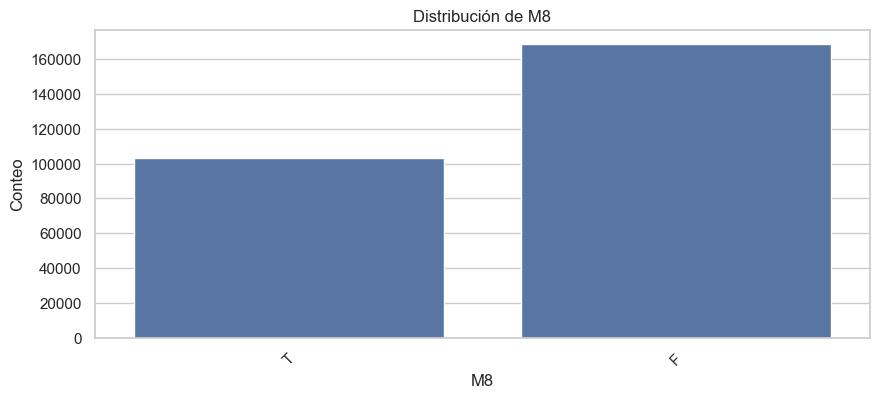

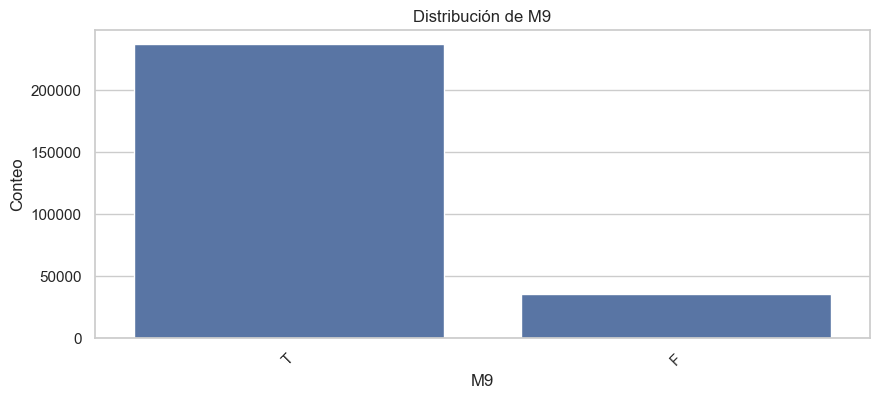

📊 Variables tipo C


,count,mean,std,min,25%,50%,75%,max,missing_%,dtype
C1,506688.0,1.009321e+01,79.334782,0.0,1.000000e+00,1.000000e+00,3.000000e+00,2950.0,0.000592,float64
C10,506688.0,1.810149e+00,23.692393,0.0,0.000000e+00,0.000000e+00,1.000000e+00,881.0,0.000592,float64
C11,506688.0,7.484594e+00,61.322505,0.0,1.000000e+00,1.000000e+00,2.000000e+00,2234.0,0.000592,float64
C12,506688.0,2.649486e+00,53.973060,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2234.0,0.000592,float64
C13,501943.0,2.781603e+01,101.114033,0.0,1.000000e+00,3.000000e+00,1.300000e+01,1562.0,0.937060,float64
C14,506688.0,6.083890e+00,28.315616,0.0,1.000000e+00,1.000000e+00,2.000000e+00,797.0,0.000592,float64
C2,506688.0,1.071464e+01,88.896921,0.0,1.000000e+00,1.000000e+00,3.000000e+00,3275.0,0.000592,float64
C3,506688.0,2.740345e-02,0.227753,0.0,0.000000e+00,0.000000e+00,0.000000e+00,31.0,0.000592,float64
C4,506688.0,2.385875e+00,41.942977,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1601.0,0.000592,float64
C5,506688.0,4.962701e+00,25.462195,0.0,0.000000e+00,0.000000e+00,1.000000e+00,376.0,0.000592,float64


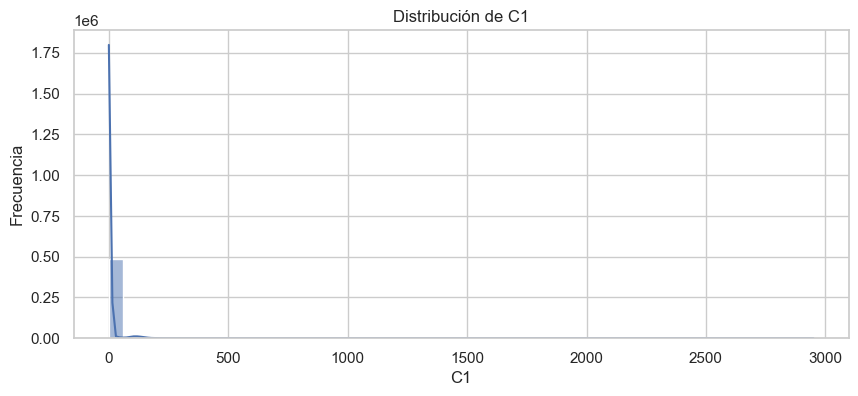

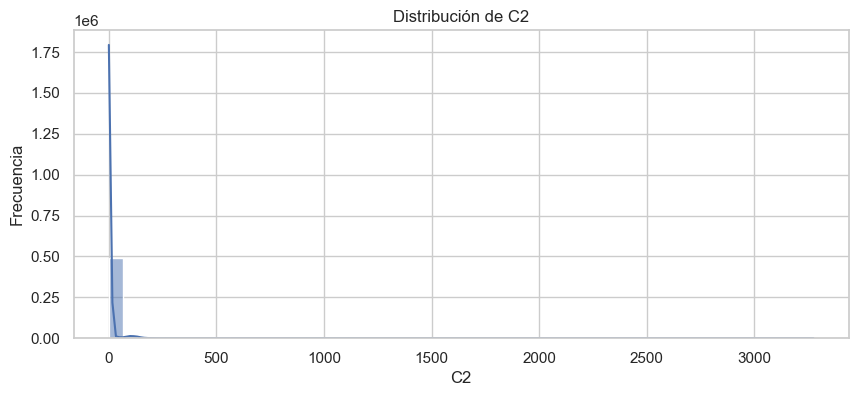

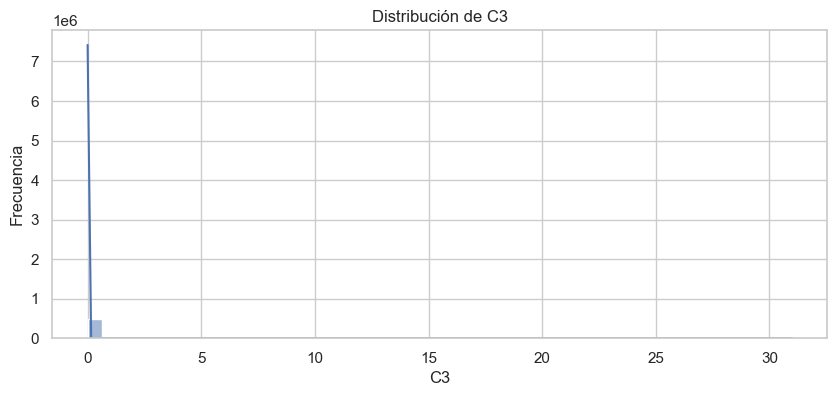

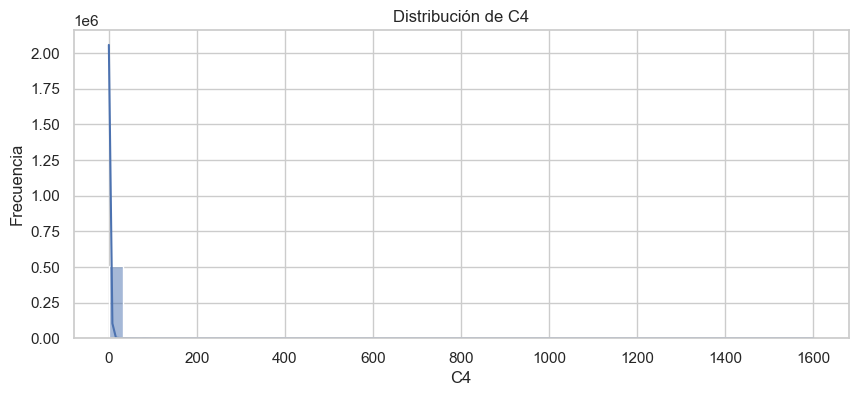

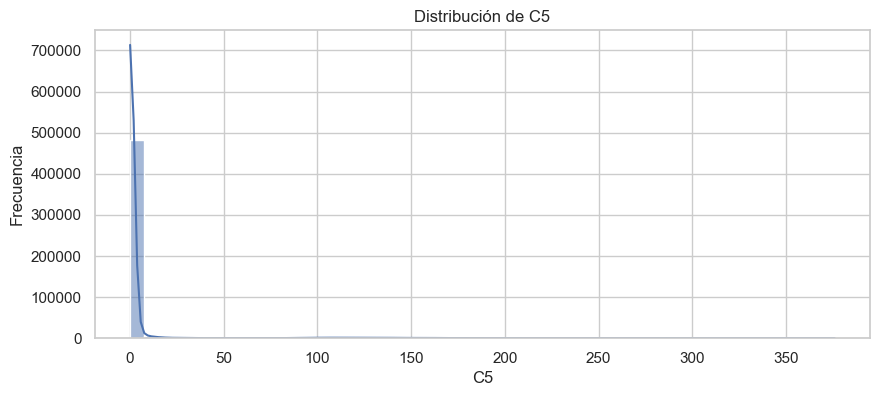

📊 Variables tipo D


,count,mean,std,min,25%,50%,75%,max,missing_%,dtype
D1,500660.0,1.082075e+02,176.964526,0.0,0.000000e+00,5.000000e+00,1.480000e+02,6.410000e+02,1.190272,float64
D10,494146.0,1.598106e+02,240.566557,0.0,0.000000e+00,1.000000e+01,2.500000e+02,1.091000e+03,2.475868,float64
D11,330173.0,2.184149e+02,253.091693,0.0,0.000000e+00,1.020000e+02,4.010000e+02,8.830000e+02,34.837406,float64
D12,69254.0,7.740418e+01,176.218548,0.0,0.000000e+00,0.000000e+00,2.500000e+01,8.790000e+02,86.332104,float64
D13,123384.0,1.822596e+01,78.079890,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.066000e+03,75.649064,float64
D14,115194.0,5.816319e+01,164.015525,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.085000e+03,77.265434,float64
D15,494622.0,2.068541e+02,269.419196,0.0,0.000000e+00,4.800000e+01,3.700000e+02,1.091000e+03,2.381925,float64
D2,271922.0,1.886666e+02,197.099611,0.0,2.600000e+01,1.120000e+02,3.050000e+02,6.410000e+02,46.333762,float64
D3,303549.0,3.339473e+01,82.558210,0.0,1.000000e+00,7.000000e+00,2.800000e+01,1.076000e+03,40.091890,float64
D4,429840.0,1.750608e+02,250.417470,0.0,0.000000e+00,2.100000e+01,2.900000e+02,1.091000e+03,15.167232,float64


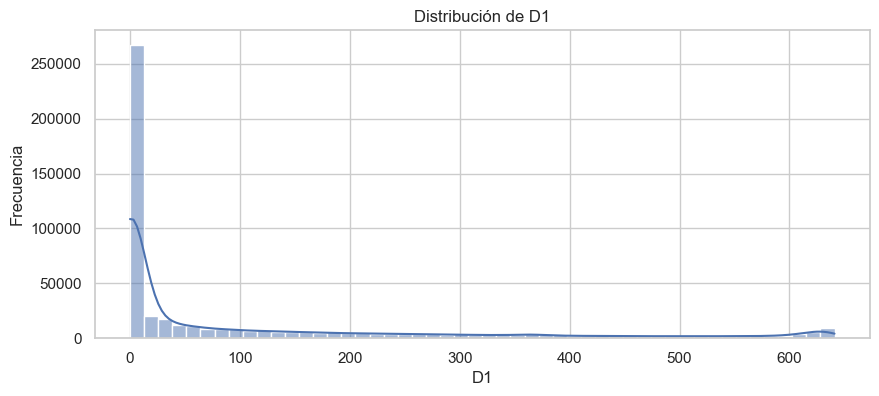

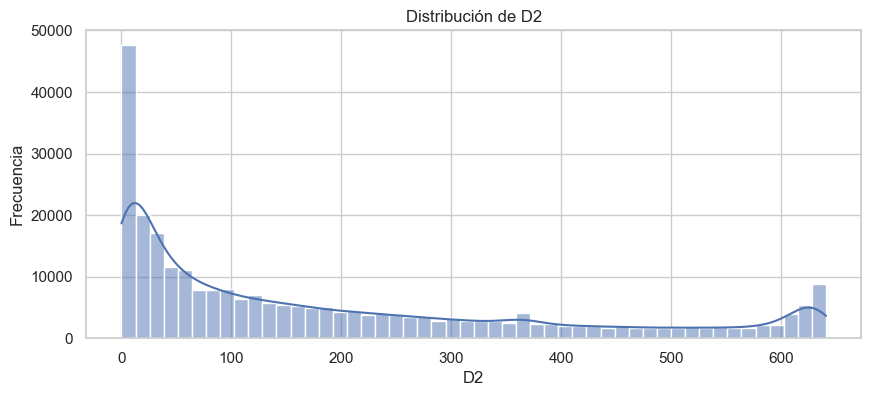

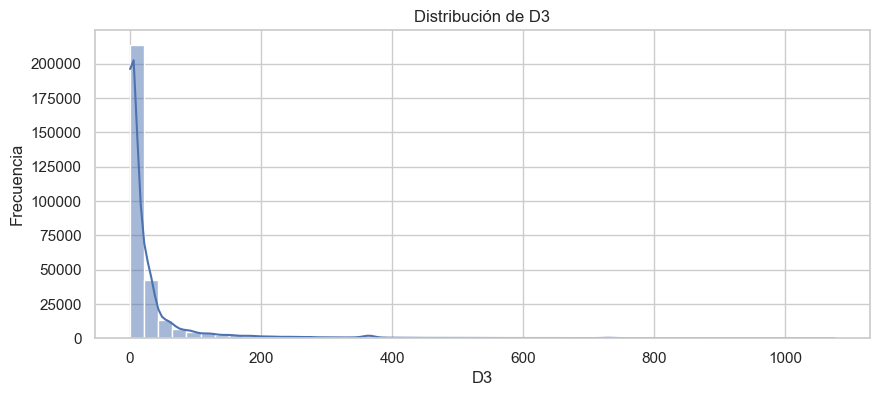

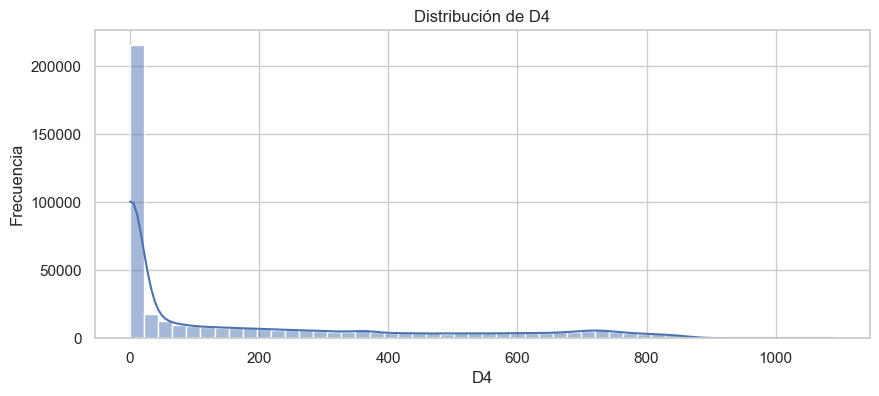

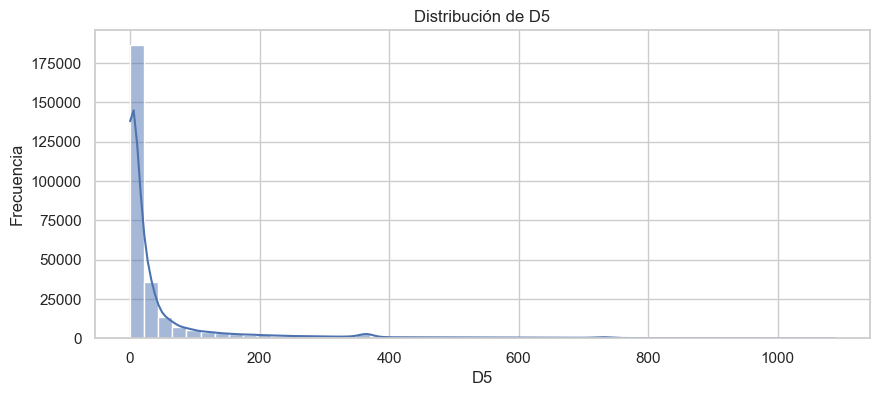

📊 Variables de identidad


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_%,dtype
DeviceType,136931,2,desktop,74403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.506522,object
TransactionID,141907.0,NaN,NaN,NaN,3972166.260614,146996.579622,3663586.0,3859267.5,4001774.0,4105284.5,4170239.0,0.000000,int64
Validaciones_Tecnicas,141907.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,float64
id-01,141907.0,NaN,NaN,NaN,-11.325734,14.50852,-100.0,-12.5,-5.0,-5.0,0.0,0.000000,float64
id-02,136976.0,NaN,NaN,NaN,192658.729909,182613.277215,2.0,63339.5,133189.5,265717.5,999869.0,3.474811,float64
id-03,66481.0,NaN,NaN,NaN,0.053008,0.684551,-12.0,0.0,0.0,0.0,11.0,53.151712,float64
id-04,66481.0,NaN,NaN,NaN,-0.087454,0.840351,-19.0,0.0,0.0,0.0,0.0,53.151712,float64
id-05,134750.0,NaN,NaN,NaN,1.246033,5.071394,-81.0,0.0,0.0,1.0,52.0,5.043444,float64
id-06,134750.0,NaN,NaN,NaN,-6.803829,15.921457,-100.0,-6.0,0.0,0.0,0.0,5.043444,float64
id-09,74338.0,NaN,NaN,NaN,0.076219,1.009687,-32.0,0.0,0.0,0.0,16.0,47.614987,float64


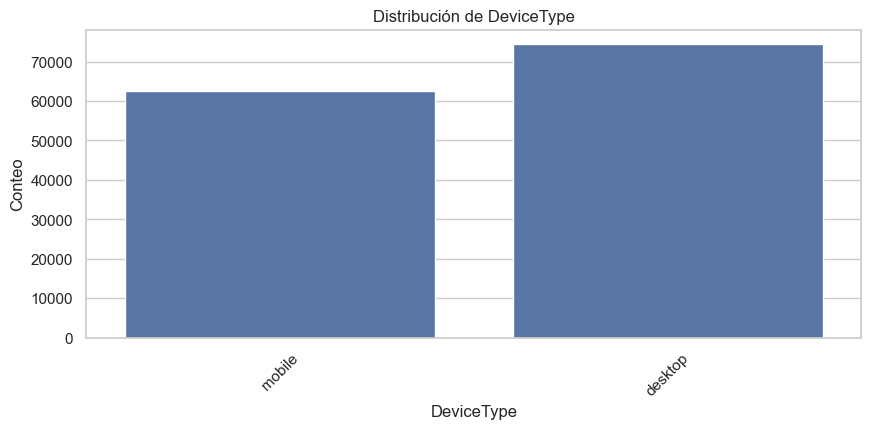

In [122]:
# Análisis descriptivo de trans_basic
describe_columns(trans_basic, "Variables básicas")

# Análisis visual de columnas numéricas clave
plot_distribution(trans, 'TransactionAmt', bins=100, log=False)
plot_countplot(trans_basic, 'TransactionHour')
plot_countplot(trans, 'card1', top_n=10)
plot_countplot(trans, 'addr1', top_n=10)
plot_countplot(trans, "ProductCD", top_n=10)

# Variables tipo M
describe_columns(trans_match, "Variables tipo M")
for col in [c for c in trans_match.columns if c.startswith('M')]:
    plot_countplot(trans_match, col)

# Variables tipo C
describe_columns(trans_count, "Variables tipo C")
for col in [c for c in trans_count.columns if c.startswith('C')][:5]:
    plot_distribution(trans_count, col)

# Variables tipo D
describe_columns(trans_delta, "Variables tipo D")
for col in [c for c in trans_delta.columns if c.startswith('D')][:5]:
    plot_distribution(trans_delta, col)

# Variables de identidad
describe_columns(iden_reducida, "Variables de identidad")
for col in ['DeviceType'] + [c for c in iden_reducida.columns if c.startswith('id_')][:5]:
    if iden_reducida[col].dtype == 'object':
        plot_countplot(iden_reducida, col)
    else:
        plot_distribution(iden_reducida, col)


## 6. Correlaciones entre columnas M, C, D e I

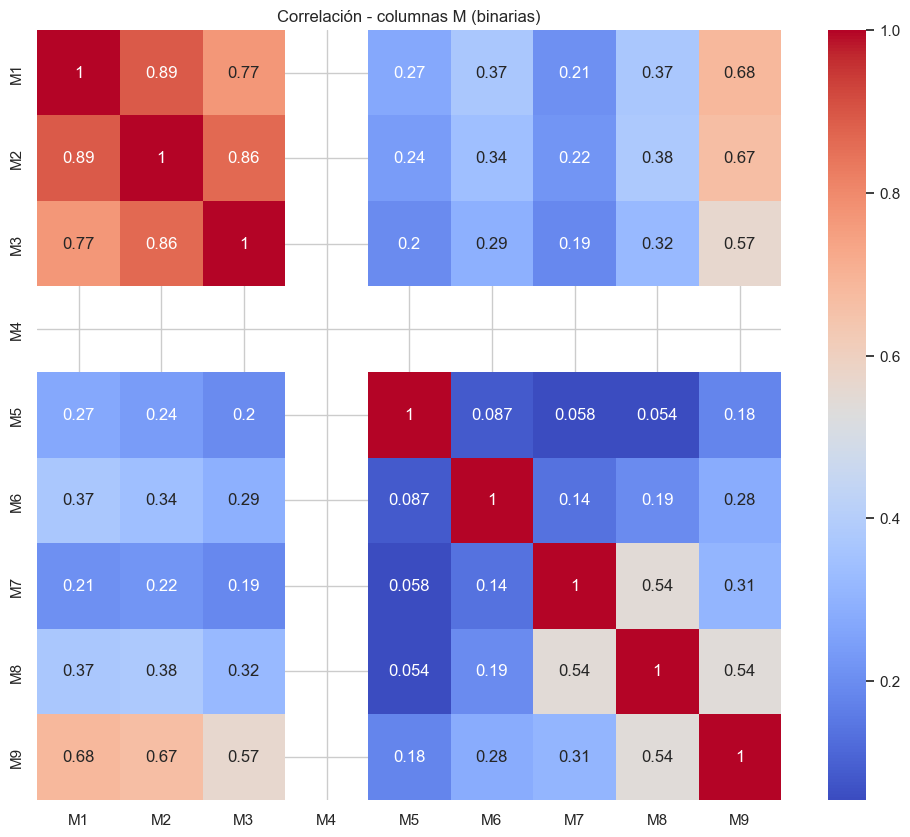

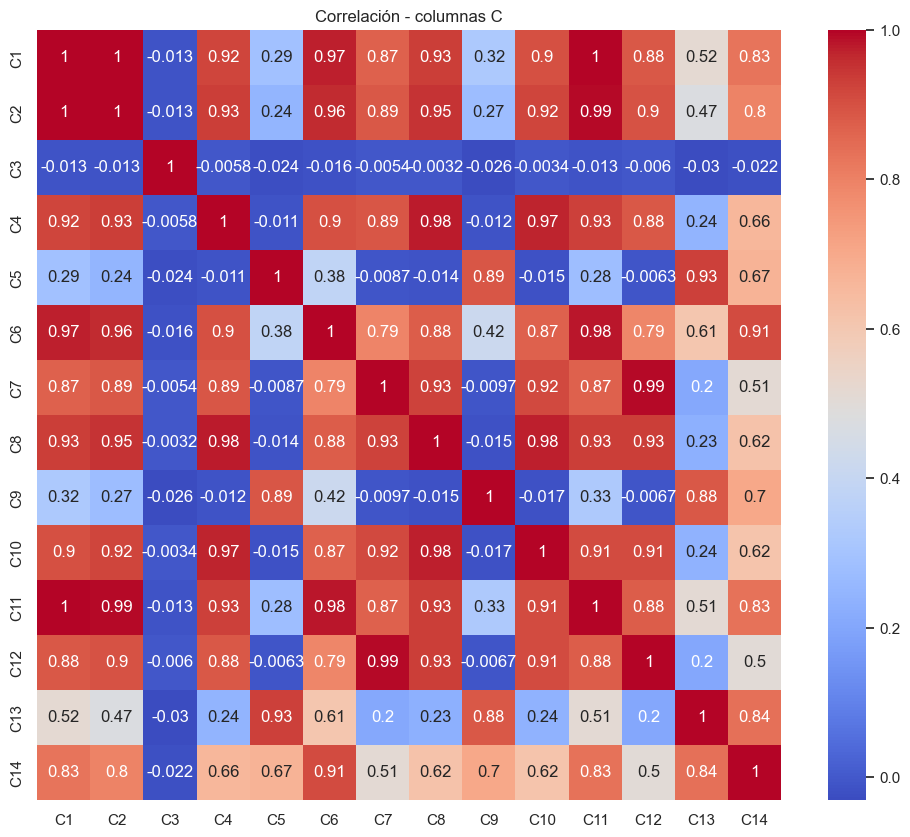

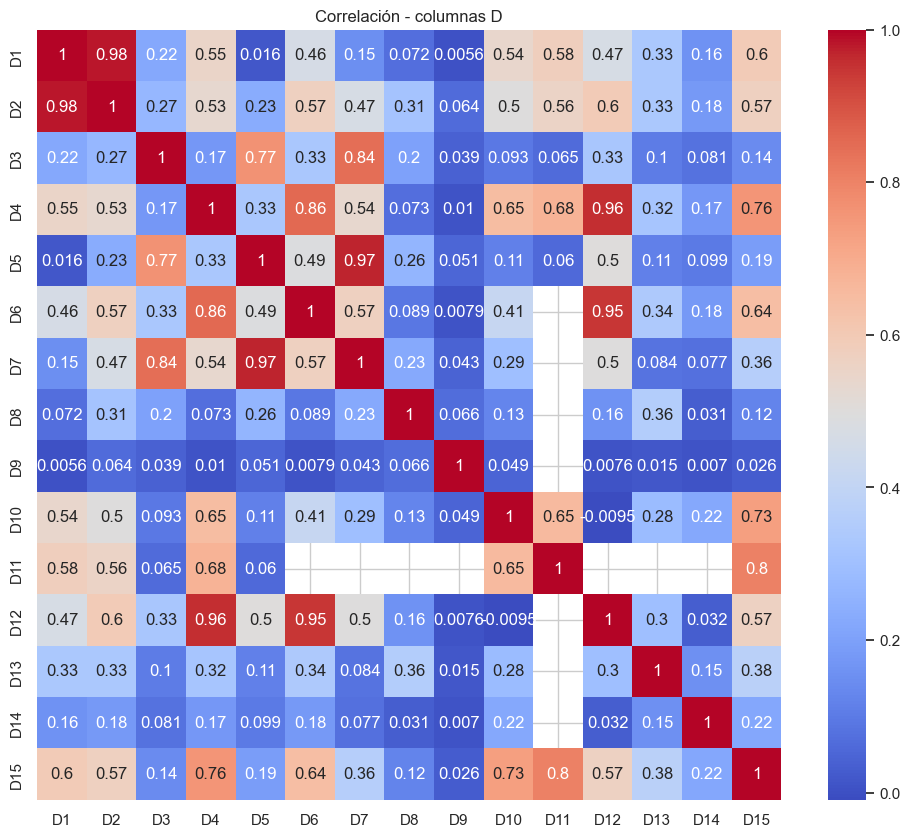

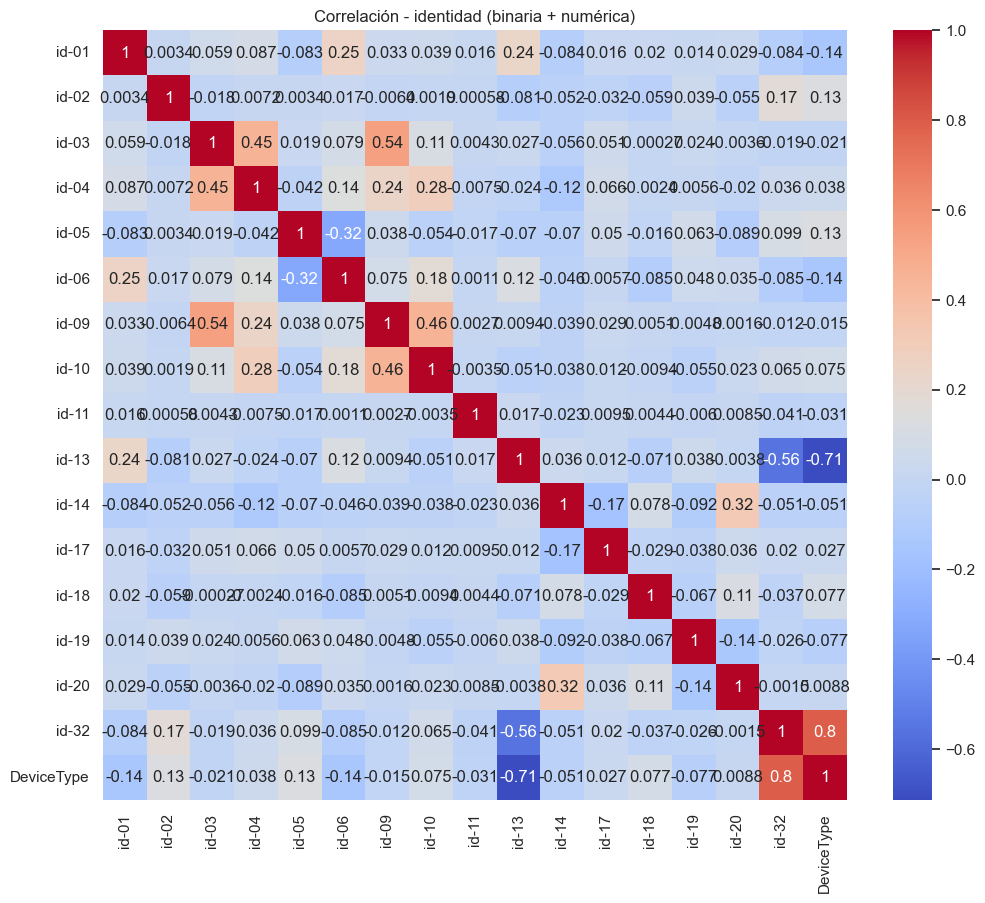

In [95]:

def binarizar_columnas(df, columnas):
    df_bin = df.copy()
    for col in columnas:
        if col in df_bin.columns:
            df_bin[col] = df_bin[col].apply(lambda x: 1 if x == 'T' or x == 'mobile' else 0)
    return df_bin

def plot_corr(df, title='Matriz de Correlación'):
    if df.shape[1] < 2:
        print(f"⚠️ No hay suficientes columnas numéricas para correlación en: {title}")
        return
    corr = df.drop(columns='TransactionID', errors='ignore').corr()
    if corr.empty:
        print(f"⚠️ Correlación vacía para: {title}")
        return
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(title)
    plt.show()

# M
if not trans_match.empty:
    m_cols = [col for col in trans_match.columns if col.startswith('M')]
    trans_match_bin = binarizar_columnas(trans_match.copy(), m_cols)
    plot_corr(trans_match_bin.dropna(), 'Correlación - columnas M (binarias)')

# C
c_cols_bin = [col for col in trans_count.columns if trans_count[col].dropna().astype(str).isin(['T', 'F']).any()]
trans_count_bin = binarizar_columnas(trans_count.copy(), c_cols_bin)
plot_corr(trans_count_bin.dropna(), 'Correlación - columnas C')

# D
if not trans_delta.empty:
    plot_corr(trans_delta, 'Correlación - columnas D')

# Identity
identity_bin_cols = ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'DeviceType']
iden_corr_bin = binarizar_columnas(iden_reducida.copy(), identity_bin_cols)
iden_corr_bin = iden_corr_bin.select_dtypes(include=['int64', 'float64'])
plot_corr(iden_corr_bin.dropna(), 'Correlación - identidad (binaria + numérica)')


## 7. Agrupación de variables por correlación

### REVISAR

In [96]:

# Agrupación por patrones de correlación

# M: sumar valores 'T'
trans_match_bin = trans_match.copy()
for col in trans_match_bin.columns:
    if col.startswith('M'):
        trans_match_bin[col] = trans_match_bin[col].map({'T': 1, 'F': 0})
trans_match_bin['M_total'] = trans_match_bin.drop(columns='TransactionID').sum(axis=1)

# C: promedio de las más correlacionadas
grupo_c = ['C1','C2','C4','C8','C10','C11','C12']
trans_count['C_cluster_avg'] = trans_count[grupo_c].mean(axis=1)

# D: promedio y rango
d_cols = [c for c in trans_delta.columns if c.startswith('D')]
trans_delta['D_promedio'] = trans_delta[d_cols].mean(axis=1)
trans_delta['D_rango'] = trans_delta[d_cols].max(axis=1) - trans_delta[d_cols].min(axis=1)

# Identity: convertir validaciones a binario antes de sumar
val_cols = ['id-13', 'id-15', 'id-16', 'id-28', 'id-29']
for col in val_cols:
    if col in iden_reducida.columns:
        iden_reducida[col] = iden_reducida[col].map({'T': 1, 'F': 0, np.nan: 0})

iden_reducida['Validaciones_Tecnicas'] = iden_reducida[val_cols].sum(axis=1)


## 8. Tabla final con ClientID y features seleccionados

### REVISAR

In [124]:

import hashlib

def generar_client_id(row, cols):
    key = '_'.join([str(row[c]) for c in cols])
    return hashlib.sha256(key.encode()).hexdigest()

id_cols = ['card1','card2','card3','card4','card5','card6','addr1','P_emaildomain']
trans_basic['ClientID'] = trans_basic[id_cols].apply(lambda row: generar_client_id(row, id_cols), axis=1)

# Merge de tablas útiles
df_merged = trans_basic[['TransactionID', 'ClientID', 'TransactionDT', 'TransactionHour', 'TransactionAmt','TransactionDate',"P_emaildomain","card4",'card6','addr1','card2',"ProductCD"]].merge(
    trans_match_bin[['TransactionID', 'M_total']],
    on='TransactionID', how='left'
).merge(
    trans_count[['TransactionID', 'C_cluster_avg']],
    on='TransactionID', how='left'
).merge(
    trans_delta[['TransactionID', 'D_promedio', 'D_rango']],
    on='TransactionID', how='left'
).merge(
    iden_reducida[['TransactionID', 'DeviceType', 'Validaciones_Tecnicas']],
    on='TransactionID', how='left'
)
df_merged.head()


,TransactionID,ClientID,TransactionDT,TransactionHour,TransactionAmt,TransactionDate,P_emaildomain,card4,card6,addr1,card2,ProductCD,M_total,C_cluster_avg,D_promedio,D_rango,DeviceType,Validaciones_Tecnicas
0,3663549,7988d8c4766a87ae9302232974d6e8f2a73ee3b436bb9e...,2017-08-02 00:00:24,0,31.95,2017-08-02,gmail.com,visa,debit,170.0,111.0,W,5.0,2.571429,290.000,392.0,NaN,NaN
1,3663550,5ec48edf3b29a3b2cd49b87c9bd6613ad4f013b040e329...,2017-08-02 00:01:03,0,49.00,2017-08-02,aol.com,visa,debit,299.0,111.0,W,1.0,1.000000,305.625,627.0,NaN,NaN
2,3663551,6bc0a2297481b30a25a0401f4b9ebe3f95f0723cece7e7...,2017-08-02 00:01:50,0,171.00,2017-08-02,hotmail.com,visa,debit,472.0,574.0,W,2.0,0.857143,95.000,127.0,NaN,NaN
3,3663552,c958ed2571c02d22f0fc942ef0118d314858d6d2f51558...,2017-08-02 00:01:50,0,284.95,2017-08-02,gmail.com,visa,debit,205.0,360.0,W,4.0,1.285714,141.750,201.0,NaN,NaN
4,3663553,dddea419e4f02874f1c8ac8761a5c42e9f98d9a5cb487b...,2017-08-02 00:01:57,0,67.95,2017-08-02,gmail.com,mastercard,debit,264.0,452.0,W,5.0,2.571429,16.500,22.0,NaN,NaN


In [125]:
# Total de transacciones por cliente
df_merged['TotalTransaccionesCliente'] = df_merged.groupby('ClientID')['TransactionID'].transform('count')

# Monto promedio y desviación estándar
df_merged['MontoPromedioCliente'] = df_merged.groupby('ClientID')['TransactionAmt'].transform('mean')
df_merged['MontoDesviacionCliente'] = df_merged.groupby('ClientID')['TransactionAmt'].transform('std').fillna(0)

# Diferencia entre transacción actual y monto promedio
df_merged['DiferenciaMontoCliente'] = df_merged['TransactionAmt'] - df_merged['MontoPromedioCliente']

# Hora promedio de transacción del cliente
df_merged['HoraPromedioCliente'] = df_merged.groupby('ClientID')['TransactionHour'].transform('mean')

# Días activos por cliente
dias_por_cliente = df_merged.groupby('ClientID')['TransactionDate'].nunique()

## 9.1 Modelos simples y explicaciones de fraude -NO FUNCIONA MUY BIEN

In [99]:
# Instalar imbalanced-learn si es necesario
!pip install -q imbalanced-learn

In [101]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Simular etiqueta si no existe
df_merged['isFraud'] = df_merged.get('isFraud', pd.Series(np.random.binomial(1, 0.03, len(df_merged))))

# Convertir DeviceType a binario
df_merged['DeviceType'] = df_merged['DeviceType'].map({'mobile': 1, 'desktop': 0}).fillna(0)

# Selección de variables predictoras
features = [
    'TransactionAmt', 'TransactionHour', 'M_total', 'C_cluster_avg',
    'D_promedio', 'D_rango', 'Validaciones_Tecnicas', 'DeviceType',
    'TotalTransaccionesCliente', 'MontoPromedioCliente', 'MontoDesviacionCliente',
    'DiferenciaMontoCliente', 'HoraPromedioCliente'
]


X = df_merged[features].fillna(0)
y = df_merged['isFraud']

# División de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicación de SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Modelos a entrenar
model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(max_iter=500)
model_gb = GradientBoostingClassifier(random_state=42)
model_hgb = HistGradientBoostingClassifier(random_state=42)

modelos = {
    'Random Forest': model_rf,
    'Logistic Regression': model_lr,
    'Gradient Boosting': model_gb,
    'HistGradient Boosting': model_hgb
}

# Evaluación con ajuste de umbral y curva PR
def evaluar_con_umbral(modelo, nombre, X_test, y_test, threshold=0.3):
    y_prob = modelo.predict_proba(X_test)[:, 1]
    y_pred_custom = (y_prob > threshold).astype(int)

    print(f"🧪 {nombre} (threshold={threshold})")
    print(classification_report(y_test, y_pred_custom, zero_division=0))
    print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}\\n")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{nombre} (AP={ap:.2f})")

# Entrenamiento y evaluación visual
plt.figure(figsize=(10, 6))
for nombre, modelo in modelos.items():
    modelo.fit(X_train_smote, y_train_smote)
    #modelo.fit(X_train, y_train)
    evaluar_con_umbral(modelo, nombre, X_test, y_test)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.grid(True)
plt.legend()
plt.show()




KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

def encontrar_umbral_optimo(modelo, X_test, y_test, metric='f1'):
    y_prob = modelo.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Evita división por cero
    
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    
    return best_threshold, precision[best_idx], recall[best_idx], f1_scores[best_idx]

# Mostrar mejor threshold para cada modelo
print("🎯 Mejores thresholds basados en F1-score:\n")
for nombre, modelo in modelos.items():
    best_thresh, p, r, f1 = encontrar_umbral_optimo(modelo, X_test, y_test)
    print(f"🔧 {nombre}: threshold óptimo = {best_thresh:.2f} → Precision: {p:.2f}, Recall: {r:.2f}, F1: {f1:.2f}")


🎯 Mejores thresholds basados en F1-score:

🔧 Random Forest: threshold óptimo = 0.00 → Precision: 0.03, Recall: 1.00, F1: 0.06
🔧 Logistic Regression: threshold óptimo = 0.03 → Precision: 0.03, Recall: 0.26, F1: 0.06
🔧 Gradient Boosting: threshold óptimo = 0.03 → Precision: 0.03, Recall: 0.57, F1: 0.06
🔧 HistGradient Boosting: threshold óptimo = 0.03 → Precision: 0.03, Recall: 0.59, F1: 0.06


In [ ]:
print("📊 Evaluación con el mejor threshold por modelo:\n")

for nombre, modelo in modelos.items():
    # Obtener probabilidades y mejor threshold
    y_prob = modelo.predict_proba(X_test)[:, 1]
    best_thresh, _, _, _ = encontrar_umbral_optimo(modelo, X_test, y_test)
    
    # Aplicar threshold óptimo
    y_pred_opt = (y_prob > best_thresh).astype(int)
    
    print(f"🔍 {nombre} (threshold óptimo = {best_thresh:.2f})")
    print(classification_report(y_test, y_pred_opt, zero_division=0))
    print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}\\n")


📊 Evaluación con el mejor threshold por modelo:

🔍 Random Forest (threshold óptimo = 0.00)
              precision    recall  f1-score   support

           0       0.97      0.17      0.29     98384
           1       0.03      0.82      0.06      2955

    accuracy                           0.19    101339
   macro avg       0.50      0.50      0.17    101339
weighted avg       0.94      0.19      0.28    101339

AUC: 0.4994\n
🔍 Logistic Regression (threshold óptimo = 0.03)
              precision    recall  f1-score   support

           0       0.97      0.76      0.86     98384
           1       0.03      0.26      0.06      2955

    accuracy                           0.75    101339
   macro avg       0.50      0.51      0.46    101339
weighted avg       0.94      0.75      0.83    101339

AUC: 0.5099\n
🔍 Gradient Boosting (threshold óptimo = 0.03)
              precision    recall  f1-score   support

           0       0.97      0.46      0.62     98384
           1       0.03 

## 9.2 Reglas de fraude sin modelo

,Regla,Transacciones_Activadas,Porcentaje_Activadas (%)
0,Regla7,60830,12.005344
1,Regla3,23345,4.607345
2,Regla6,2080,0.410507
3,Regla1,1439,0.284000
4,Regla2,166,0.032762
5,Regla4,126,0.024867
6,Regla5,83,0.016381


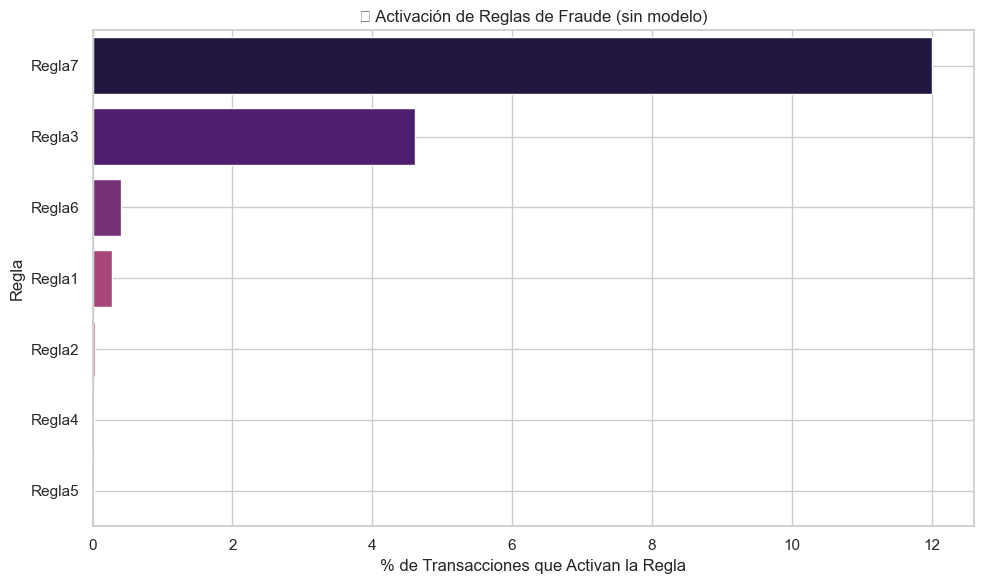

In [130]:

# Regla 1: Horario inusual + validaciones débiles + poco match + tarjeta Discover/AMEX
df_merged['Regla1'] = (
    (df_merged['TransactionHour'].between(1, 5)) &
    (df_merged['Validaciones_Tecnicas'] < 2) &
    (df_merged['M_total'] < 2) &
    (df_merged['card4'].isin(['discover', 'american express']))
).astype(int)

# Regla 2: Cliente nuevo + validaciones bajas + monto alto + tarjeta poco común
df_merged['Regla2'] = (
    (df_merged['TotalTransaccionesCliente'] <= 2) &
    (df_merged['Validaciones_Tecnicas'] < 2) &
    (df_merged['TransactionAmt'] > 500) &
    (df_merged['card4'].isin(['discover', 'american express']))
).astype(int)

# Regla 3: Actividad fuera de horario + tarjeta débito + validación débil + poco match
df_merged['Regla3'] = (
    ((df_merged['TransactionHour'] >= 23) | (df_merged['TransactionHour'] <= 3)) &
    (df_merged['card6'] == 'debit') &
    (df_merged['Validaciones_Tecnicas'] < 2) &
    (df_merged['M_total'] < 2)
).astype(int)

# Regla 4: Dirección incompleta + validación débil + monto medio-alto
df_merged['Regla4'] = (
    df_merged['addr1'].isna() &
    (df_merged['Validaciones_Tecnicas'] < 2) &
    (df_merged['TransactionAmt'] > 300) &
    (df_merged['M_total'] < 2)
).astype(int)

# Regla 5: Email ausente + validaciones técnicas bajas + card2 poco común
df_merged['Regla5'] = (
    df_merged['P_emaildomain'].isna() &
    (df_merged['Validaciones_Tecnicas'] < 2) &
    (df_merged['card2'] < 150) &
    (df_merged['TransactionAmt'] > 200)
).astype(int)

# Regla 6: Monto exacto muy común en fraude
montos_comunes = [9.99, 99.00, 500.00, 1000.00]
df_merged['Regla6'] = df_merged['TransactionAmt'].isin(montos_comunes).astype(int)

# Regla 7: ProductCD raro + tarjeta débito + validación débil
df_merged['Regla7'] = (
    (df_merged['ProductCD'].isin(['C', 'H'])) &
    (df_merged['card6'] == 'debit') &
    (df_merged['Validaciones_Tecnicas'] < 2)
).astype(int)



# --- Tabla resumen de activación por regla ---
reglas = ['Regla1', 'Regla2', 'Regla3', 'Regla4', 'Regla5', 'Regla6', 'Regla7']

resumen_reglas = pd.DataFrame({
    'Regla': reglas,
    'Transacciones_Activadas': [df_merged[regla].sum() for regla in reglas],
    'Porcentaje_Activadas (%)': [100 * df_merged[regla].mean() for regla in reglas]
}).sort_values(by='Porcentaje_Activadas (%)', ascending=False).reset_index(drop=True)


display (resumen_reglas)

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=resumen_reglas, x='Porcentaje_Activadas (%)', y='Regla', palette='magma')
plt.title("🔍 Activación de Reglas de Fraude (sin modelo)")
plt.xlabel("% de Transacciones que Activan la Regla")
plt.ylabel("Regla")
plt.grid(True)
plt.tight_layout()
plt.show()



In [139]:
# Asignar pesos y calcular ScoreFraude si no existe
pesos = {
    'Regla1': 4,
    'Regla2': 5,
    'Regla3': 3,
    'Regla4': 2,
    'Regla5': 1,
    'Regla6': 2,
    'Regla7': 1
}
df_merged['ScoreFraude'] = sum(df_merged[r] * peso for r, peso in pesos.items())

# Crear tabla con distribución de ScoreFraude y porcentaje
tabla_score = (
    df_merged['ScoreFraude']
    .value_counts()
    .sort_index()
    .reset_index()
    
)

# Calcular porcentaje
total_transacciones = tabla_score['count'].sum()
tabla_score['Porcentaje (%)'] = (tabla_score['count'] / total_transacciones * 100).round(2)

tabla_score




,ScoreFraude,count,Porcentaje (%)
0,0,438972,86.64
1,1,40778,8.05
2,2,1988,0.39
3,3,3266,0.64
4,4,21381,4.22
5,5,140,0.03
6,6,83,0.02
7,7,40,0.01
8,8,13,0.00
9,9,21,0.00


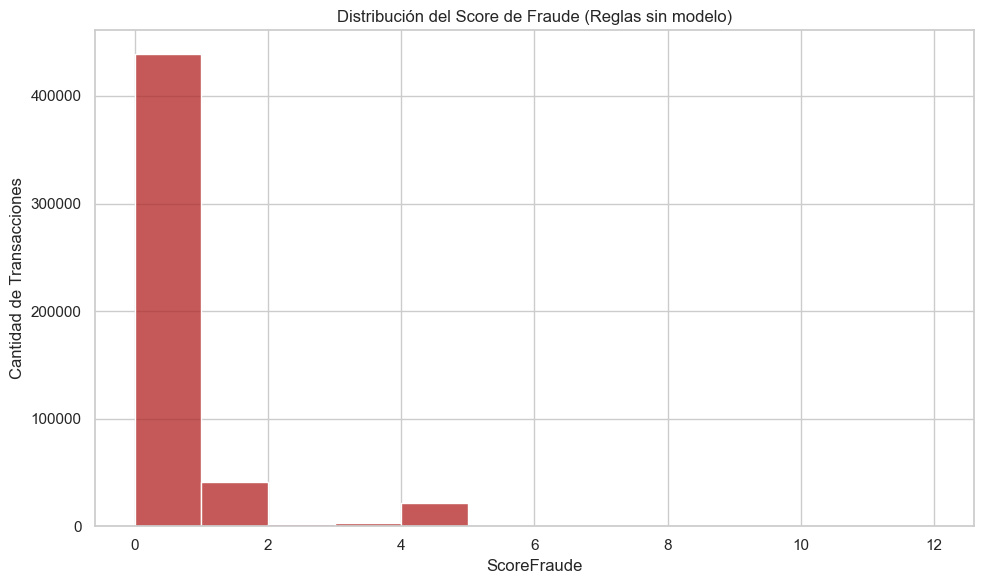

In [ ]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['ScoreFraude'], bins=range(0, df_merged['ScoreFraude'].max()+2), kde=False, color='firebrick')
plt.title("Distribución del Score de Fraude (Reglas sin modelo)")
plt.xlabel("ScoreFraude")
plt.ylabel("Cantidad de Transacciones")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
if 'ScoreFraude' not in df_merged.columns:
    print("Primero debes calcular ScoreFraude.")

# Crear columna de flag de fraude
df_merged['FlagFraude'] = (df_merged['ScoreFraude'] >= 5).astype(int)

# Opcional: Ver cuántas transacciones fueron flaggeadas
print("Transacciones flaggeadas como fraude:", df_merged['FlagFraude'].sum())


Transacciones flaggeadas como fraude: 306


In [147]:
#porcentaje de fraude
display((df_merged['FlagFraude'].sum()/total_transacciones) *100.00)

#literatura (0,01–0,1 % de fraude)

np.float64(0.06039183644469706)

In [148]:
clientes_con_fraude = df_merged[df_merged['FlagFraude'] == 1]['ClientID'].nunique()
print(f"Clientes únicos con al menos una transacción flaggeada como fraude: {clientes_con_fraude}")

total_clientes = df_merged['ClientID'].nunique()
porcentaje = round((clientes_con_fraude / total_clientes) * 100, 2)

print(f"Eso representa el {porcentaje}% del total de clientes.")


Clientes únicos con al menos una transacción flaggeada como fraude: 232
Eso representa el 0.28% del total de clientes.


In [149]:
# Contar transacciones flaggeadas por cliente
top_clientes = (
    df_merged[df_merged['FlagFraude'] == 1]
    .groupby('ClientID')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='TransaccionesFraudulentas')
)

top_clientes


,ClientID,TransaccionesFraudulentas
0,b72768beafbcf8330eb62d52aed2fbdbebbd9f347f02b9...,5
1,df1227298258d5f9081176d0e01c08edd61e1cef6ba591...,5
2,a6dd1e3dfa3026a9b657e2ddc699edd3eaa1e305f62fb0...,4
3,a917698beeaaba545f00eef5ac84bc58749926c1d1a877...,4
4,5e382366ac2d449bc78700fefae72f3f8d066a5b2e93e9...,3
5,c17873e540e9094d9071db8d7b1cf2900b9f48f003b6ad...,3
6,1f30cb63bbb6c0e504ced5af35fd2a7ac5ef7f9c6d06ca...,3
7,4edc6b3b5fde2ecfeca7204911c430361c8564ec353f92...,3
8,e7b43636601f1602ec6cb93a63b23a1ceafbfd7a7eb9b9...,3
9,bcbbc5ef73032d51c104c3623eb4a48840993df2563273...,2


## 10. Flag de transacciones futuras del mismo cliente

In [ ]:

# Ordenar por cliente y tiempo
df_merged = df_merged.sort_values(['ClientID', 'TransactionDate'])

# Crear columna inicializada en 0
df_merged['FlagFraudeExtendido'] = 0

# Obtener mínimo TransactionDT por cliente donde FlagFraude = 1
primer_fraude = df_merged[df_merged['FlagFraude'] == 1].groupby('ClientID')['TransactionDT'].min()

# Flaggear transacciones posteriores o iguales a la primera fraudulenta
df_merged['FlagFraudeExtendido'] = df_merged.apply(
    lambda row: 1 if row['ClientID'] in primer_fraude.index and row['TransactionDT'] >= primer_fraude[row['ClientID']] else 0,
    axis=1
)


In [144]:
# Calcular resumen de transacciones marcadas como fraude extendido
total_fraudulentas = df_merged['FlagFraudeExtendido'].sum()
total_transacciones = len(df_merged)
porcentaje_fraude = round((total_fraudulentas / total_transacciones) * 100, 2)

# Mostrar resumen
resumen_flag = pd.DataFrame({
    'Transacciones Flaggeadas como Fraude (Extendidas)': [total_fraudulentas],
    'Total de Transacciones': [total_transacciones],
    'Porcentaje Flaggeadas (%)': [porcentaje_fraude]
})

resumen_flag


,Transacciones Flaggeadas como Fraude (Extendidas),Total de Transacciones,Porcentaje Flaggeadas (%)
0,3290,506691,0.65


## 11. Insights fraude

In [152]:
insights = []

# Totales y proporciones
insights.append(f"🔍 {round(df_merged['FlagFraude'].mean() * 100, 2)}% de las transacciones fueron marcadas como fraude.")
insights.append(f"👥 {df_merged[df_merged['FlagFraude'] == 1]['ClientID'].nunique()} clientes únicos con al menos una transacción fraudulenta.")
insights.append(f"📊 El ScoreFraude más común es: {df_merged['ScoreFraude'].mode().values[0]}")
insights.append(f"📦 El rango de ScoreFraude va de {df_merged['ScoreFraude'].min()} a {df_merged['ScoreFraude'].max()}.")

# Montos
avg_fraude = df_merged[df_merged['FlagFraude'] == 1]['TransactionAmt'].mean()
avg_legit = df_merged[df_merged['FlagFraude'] == 0]['TransactionAmt'].mean()
insights.append(f"💰 Monto promedio en fraude: ${avg_fraude:.2f}, legítimo: ${avg_legit:.2f}")
insights.append(f"💸 Máximo monto en fraude: ${df_merged[df_merged['FlagFraude'] == 1]['TransactionAmt'].max():.2f}")

# ScoreFraude
insights.append(f"🧮 Promedio de ScoreFraude en fraudes: {df_merged[df_merged['FlagFraude'] == 1]['ScoreFraude'].mean():.2f}")
insights.append(f"🎯 El {round(100 * (df_merged['ScoreFraude'] >= 5).mean(), 2)}% de transacciones tienen ScoreFraude ≥ 5")

# Horario
top_hour = df_merged[df_merged['FlagFraude'] == 1]['TransactionHour'].mode().values[0]
insights.append(f"🕐 La hora más común de fraude es las {top_hour}h.")
fraude_noche = df_merged[(df_merged['FlagFraude'] == 1) & (df_merged['TransactionHour'].between(0, 6))].shape[0]
pct_noche = round(100 * fraude_noche / df_merged['FlagFraude'].sum(), 2)
insights.append(f"🌙 {pct_noche}% de fraudes ocurrieron entre las 0:00 y 6:00 am.")

# Tarjetas
top_card = df_merged[df_merged['FlagFraude'] == 1]['card4'].mode().values[0]
insights.append(f"💳 Marca de tarjeta más usada en fraude: {top_card}")
insights.append(f"🏦 Tipo de tarjeta más usada en fraude: {df_merged[df_merged['FlagFraude'] == 1]['card6'].mode().values[0]}")

# Productos
insights.append(f"🛍️ Código de producto más común en fraude: {df_merged[df_merged['FlagFraude'] == 1]['ProductCD'].mode().values[0]}")

# Emails
insights.append(f"📧 Dominio de email más usado en fraude: {df_merged[df_merged['FlagFraude'] == 1]['P_emaildomain'].mode().values[0]}")

# Ubicación
if 'addr1' in df_merged.columns:
    top_addr = df_merged[df_merged['FlagFraude'] == 1]['addr1'].mode().values[0]
    insights.append(f"🌍 Código de región (addr1) más común en fraude: {top_addr}")

# Reglas
for i in range(1, 8):
    regla_col = f"Regla{i}"
    if regla_col in df_merged.columns:
        porcentaje = round(100 * df_merged[regla_col].mean(), 2)
        insights.append(f"🧩 La {regla_col} se activa en {porcentaje}% de las transacciones.")

# Clientes reincidentes
clientes_multifraud = df_merged[df_merged['FlagFraude'] == 1]['ClientID'].value_counts()
reincidentes = clientes_multifraud[clientes_multifraud > 1].count()
insights.append(f"♻️ {reincidentes} clientes tuvieron más de una transacción marcada como fraude.")

# Tabla final
insights_df = pd.DataFrame({'Insight': insights})
display(insights_df)


,Insight
0,🔍 0.06% de las transacciones fueron marcadas como fraude.
1,👥 232 clientes únicos con al menos una transacción fraudulenta.
2,📊 El ScoreFraude más común es: 0
3,📦 El rango de ScoreFraude va de 0 a 11.
4,"💰 Monto promedio en fraude: $726.59, legítimo: $134.37"
5,💸 Máximo monto en fraude: $2000.00
6,🧮 Promedio de ScoreFraude en fraudes: 6.11
7,🎯 El 0.06% de transacciones tienen ScoreFraude ≥ 5
8,🕐 La hora más común de fraude es las 2h.
9,🌙 54.9% de fraudes ocurrieron entre las 0:00 y 6:00 am.


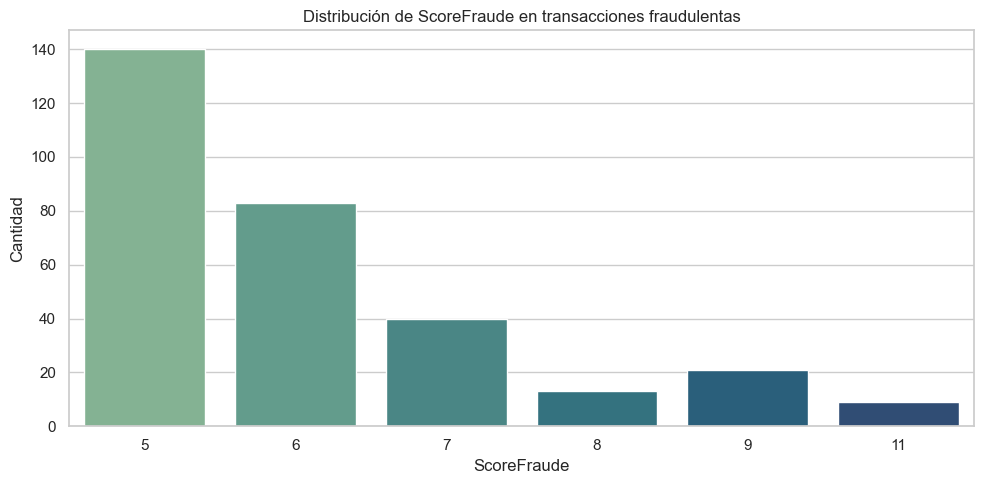

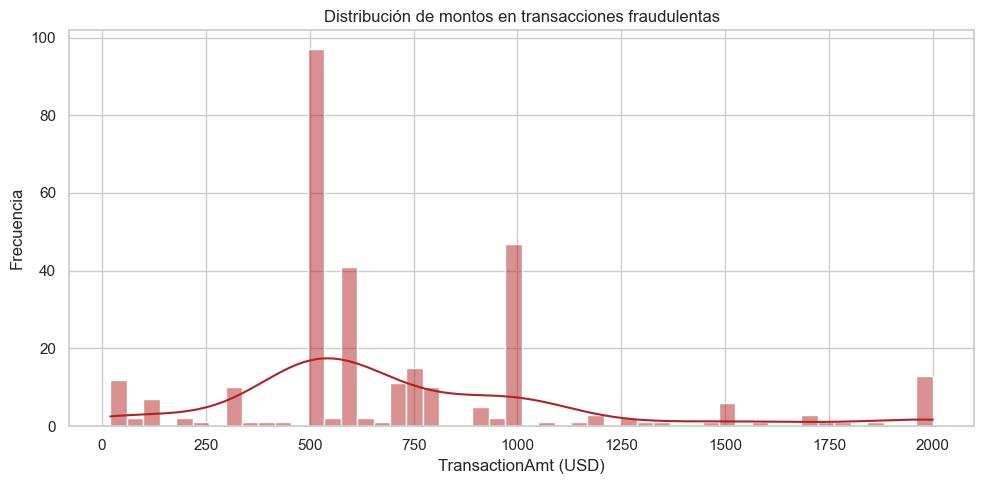

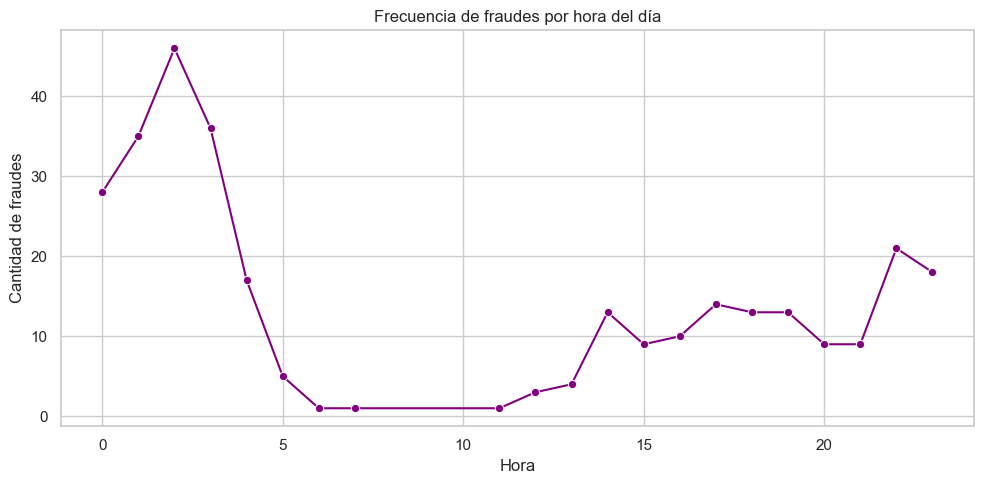

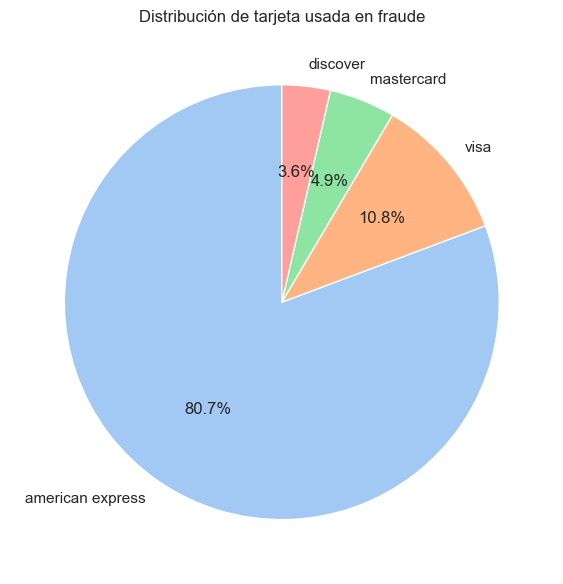

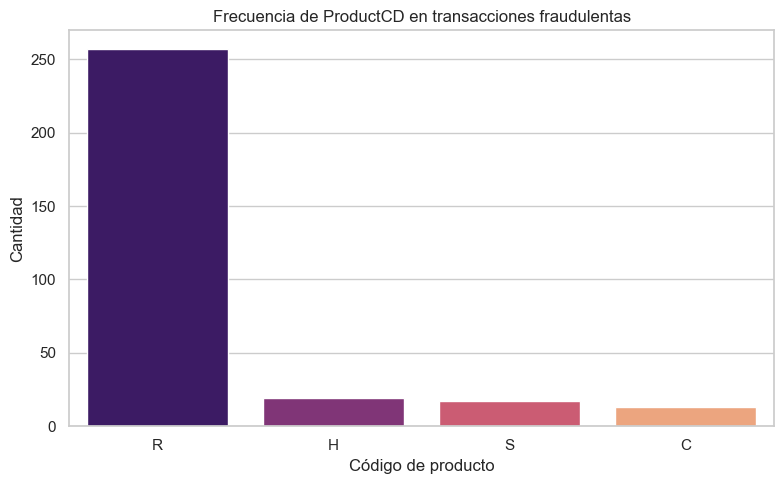

In [153]:

# Asegurar estilo
sns.set(style="whitegrid")

# Filtrar solo fraudes
fraudes = df_merged[df_merged['FlagFraude'] == 1]

# 📊 1. Barplot del ScoreFraude
plt.figure(figsize=(10, 5))
sns.countplot(data=fraudes, x='ScoreFraude', palette='crest')
plt.title("Distribución de ScoreFraude en transacciones fraudulentas")
plt.xlabel("ScoreFraude")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 📊 2. Histograma de montos
plt.figure(figsize=(10, 5))
sns.histplot(fraudes['TransactionAmt'], bins=50, kde=True, color='firebrick')
plt.title("Distribución de montos en transacciones fraudulentas")
plt.xlabel("TransactionAmt (USD)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 📊 3. Línea de frecuencia de fraude por hora del día
horas = fraudes['TransactionHour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=horas.index, y=horas.values, marker="o", color="purple")
plt.title("Frecuencia de fraudes por hora del día")
plt.xlabel("Hora")
plt.ylabel("Cantidad de fraudes")
plt.tight_layout()
plt.show()

# 📊 4. Pie chart por tipo de tarjeta (card4)
plt.figure(figsize=(6, 6))
fraudes['card4'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribución de tarjeta usada en fraude")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 📊 5. Barplot de códigos de producto (ProductCD)
plt.figure(figsize=(8, 5))
sns.countplot(data=fraudes, x='ProductCD', palette='magma')
plt.title("Frecuencia de ProductCD en transacciones fraudulentas")
plt.xlabel("Código de producto")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()


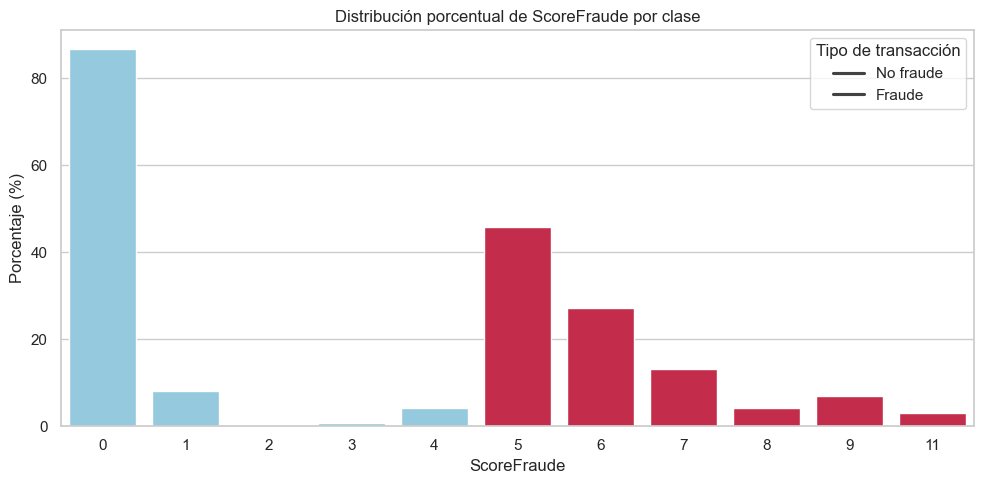

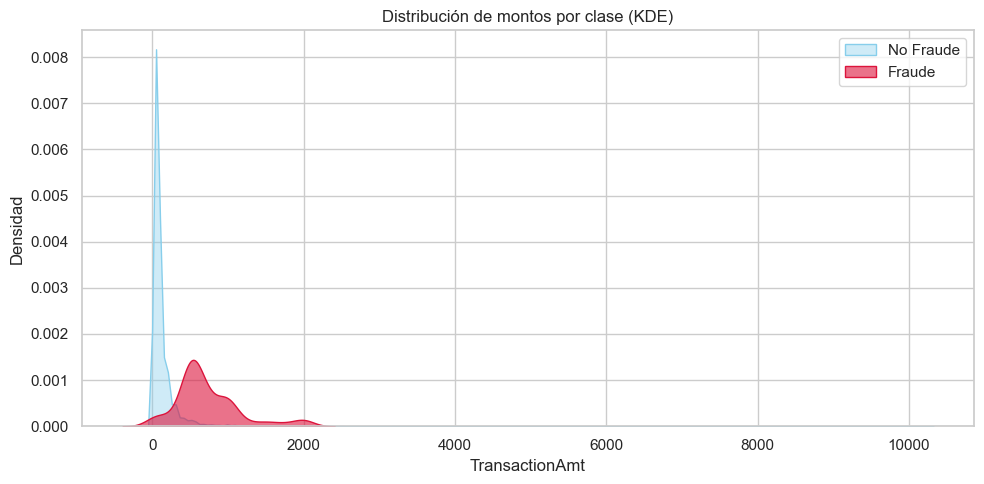

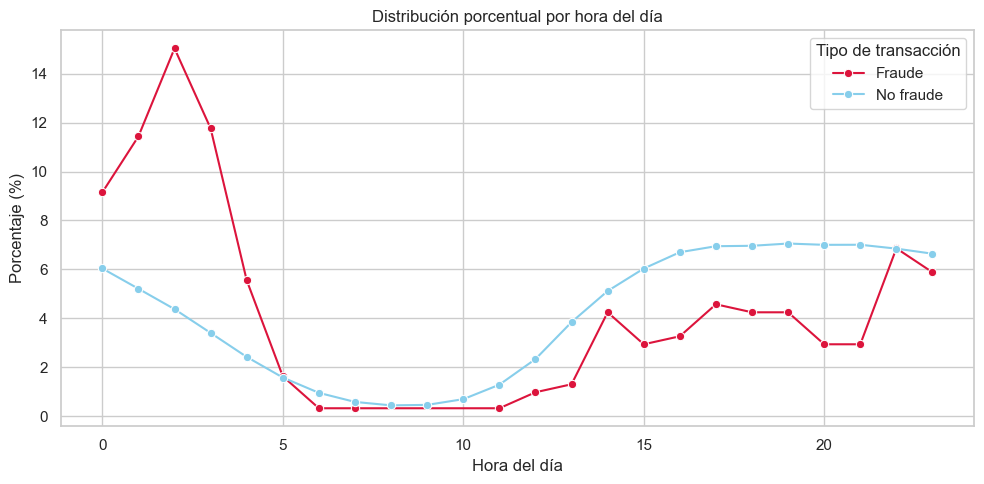

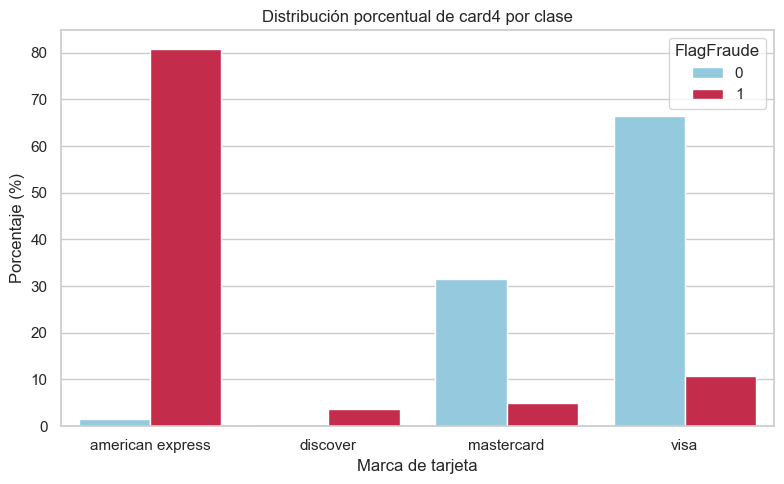

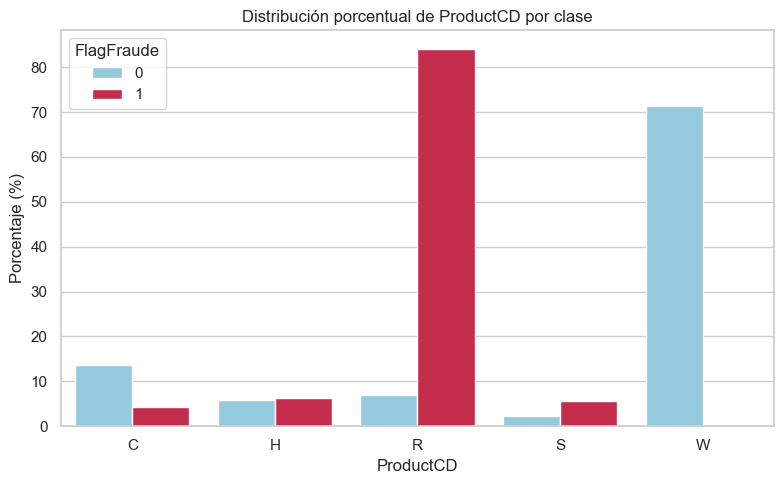

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
palette = {0: "skyblue", 1: "crimson"}

# 📊 ScoreFraude (% por clase) con leyenda clara
plt.figure(figsize=(10, 5))
score_data = df_merged.groupby(['ScoreFraude', 'FlagFraude']).size().reset_index(name='count')
score_data['pct'] = score_data.groupby('FlagFraude')['count'].transform(lambda x: 100 * x / x.sum())
sns.barplot(data=score_data, x='ScoreFraude', y='pct', hue='FlagFraude', palette=palette)
plt.title("Distribución porcentual de ScoreFraude por clase")
plt.xlabel("ScoreFraude")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Tipo de transacción", labels=["No fraude", "Fraude"], loc='upper right')
plt.tight_layout()
plt.show()

# 📊 2. Monto: KDE (curvas suavizadas, escala comparable)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_merged[df_merged['FlagFraude'] == 0], x='TransactionAmt', label="No Fraude", fill=True, alpha=0.4, color='skyblue')
sns.kdeplot(data=df_merged[df_merged['FlagFraude'] == 1], x='TransactionAmt', label="Fraude", fill=True, alpha=0.6, color='crimson')
plt.title("Distribución de montos por clase (KDE)")
plt.xlabel("TransactionAmt")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

#3.
# Crear nueva columna legible para la leyenda
df_merged['FraudeTexto'] = df_merged['FlagFraude'].map({0: 'No fraude', 1: 'Fraude'})

# Reagrupar usando texto en lugar de 0/1
hora_data = df_merged.groupby(['TransactionHour', 'FraudeTexto']).size().reset_index(name='count')
hora_data['pct'] = hora_data.groupby('FraudeTexto')['count'].transform(lambda x: 100 * x / x.sum())

# Gráfico actualizado
plt.figure(figsize=(10, 5))
sns.lineplot(data=hora_data, x='TransactionHour', y='pct', hue='FraudeTexto', palette={'No fraude': 'skyblue', 'Fraude': 'crimson'}, marker="o")
plt.title("Distribución porcentual por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Tipo de transacción", loc='upper right')
plt.tight_layout()
plt.show()


# 📊 4. Tipo de tarjeta: % por clase
card_data = df_merged.groupby(['card4', 'FlagFraude']).size().reset_index(name='count')
card_data['pct'] = card_data.groupby('FlagFraude')['count'].transform(lambda x: 100 * x / x.sum())
plt.figure(figsize=(8, 5))
sns.barplot(data=card_data, x='card4', y='pct', hue='FlagFraude', palette=palette)
plt.title("Distribución porcentual de card4 por clase")
plt.xlabel("Marca de tarjeta")
plt.ylabel("Porcentaje (%)")
plt.tight_layout()
plt.show()

# 📊 5. ProductCD: % por clase
prod_data = df_merged.groupby(['ProductCD', 'FlagFraude']).size().reset_index(name='count')
prod_data['pct'] = prod_data.groupby('FlagFraude')['count'].transform(lambda x: 100 * x / x.sum())
plt.figure(figsize=(8, 5))
sns.barplot(data=prod_data, x='ProductCD', y='pct', hue='FlagFraude', palette=palette)
plt.title("Distribución porcentual de ProductCD por clase")
plt.xlabel("ProductCD")
plt.ylabel("Porcentaje (%)")
plt.tight_layout()
plt.show()


## 12. Guardado de archivos

In [ ]:
# Columnas base siempre incluidas
base_cols = ['TransactionID', 'ClientID']

# Tabla 1: columnas hasta 'DeviceType'
idx_dev = df_merged.columns.get_loc('DeviceType')
cols1 = base_cols + list(df_merged.columns[2:idx_dev + 1])
tabla_1 = df_merged[cols1]

# Tabla 2: desde 'Validaciones_Tecnicas' hasta 'HoraPromedioCliente'
idx_start = df_merged.columns.get_loc('Validaciones_Tecnicas')
idx_end = df_merged.columns.get_loc('HoraPromedioCliente')
cols2 = base_cols + list(df_merged.columns[idx_start:idx_end + 1])
tabla_2 = df_merged[cols2]

# Tabla 3: desde 'Regla1' hasta el final (más Score y Flag)
idx_reglas = df_merged.columns.get_loc('Regla1')
cols3 = base_cols + list(df_merged.columns[idx_reglas:])
tabla_3 = df_merged[cols3]

# Tabla output: características del ClientID
cols_client = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'P_emaildomain']
output_tabla = df_merged[['ClientID'] + [c for c in cols_client if c in df_merged.columns]].drop_duplicates()

# Ruta segura relativa al notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
generado_path = os.path.join(notebook_dir, "..", "data", "generado")
os.makedirs(generado_path, exist_ok=True)

# Guardar tablas generadas por el pipeline
tabla_1.to_csv(os.path.join(generado_path, "tabla_1_inicial.csv"), index=False)
tabla_2.to_csv(os.path.join(generado_path, "tabla_2_validaciones.csv"), index=False)
tabla_3.to_csv(os.path.join(generado_path, "tabla_3_reglas.csv"), index=False)
output_tabla.to_csv(os.path.join(generado_path, "tabla_output_clientes.csv"), index=False)

print("✅ Tablas guardadas correctamente en /data/generado/")
